In [66]:
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pylab as plt
from livelossplot import PlotLossesKeras


2.13.1


In [ ]:
# Large model------------------------------------------------------------

In [67]:
# loading csv dataset for manipulator
model_size = "large"
df = pd.read_csv(f"manipulator_dataset_{model_size}.csv", index_col=False)
df

,x,y,q1,q2
0,2.000000,0.000000e+00,0.0,0.000000
1,1.999875,1.578624e-02,0.0,0.904523
2,1.999502,3.156855e-02,0.0,1.809045
3,1.998879,4.734299e-02,0.0,2.713568
4,1.998007,6.310563e-02,0.0,3.618090
...,...,...,...,...
39995,-0.001993,-6.310563e-02,180.0,176.381910
39996,-0.001121,-4.734299e-02,180.0,177.286432
39997,-0.000498,-3.156855e-02,180.0,178.190955
39998,-0.000125,-1.578624e-02,180.0,179.095477


In [68]:
# creating data and label dataframes and 

features = df.copy()
features.pop("q1")
features.pop("q2")
labels = df.copy()
labels.pop("x")
labels.pop("y")

features = np.array(features)
labels = np.array(labels)

In [69]:
# clean, normalize, and split data
feat_mean = np.mean(features, axis=0)
feat_std = np.std(features, axis=0)
lab_mean = np.mean(labels, axis=0)
lab_std = np.std(labels, axis=0)

train_data, test_data, train_targets, test_targets = train_test_split(features, labels, test_size=0.2)

In [70]:
# build the model
def get_model(wd, rate):
    model = Sequential([
        Dense(512, kernel_regularizer = regularizers.l1_l2(wd, wd), activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(train_targets.shape[1])
    ])
    return model

model = get_model(1e-3, 0.2)

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 512)               1536      
                                                                 
 dense_121 (Dense)           (None, 512)               262656    
                                                                 
 dense_122 (Dense)           (None, 512)               262656    
                                                                 
 dense_123 (Dense)           (None, 512)               262656    
                                                                 
 dense_124 (Dense)           (None, 512)               262656    
                                                                 
 dense_125 (Dense)           (None, 512)               262656    
                                                                 
 dense_126 (Dense)           (None, 512)              

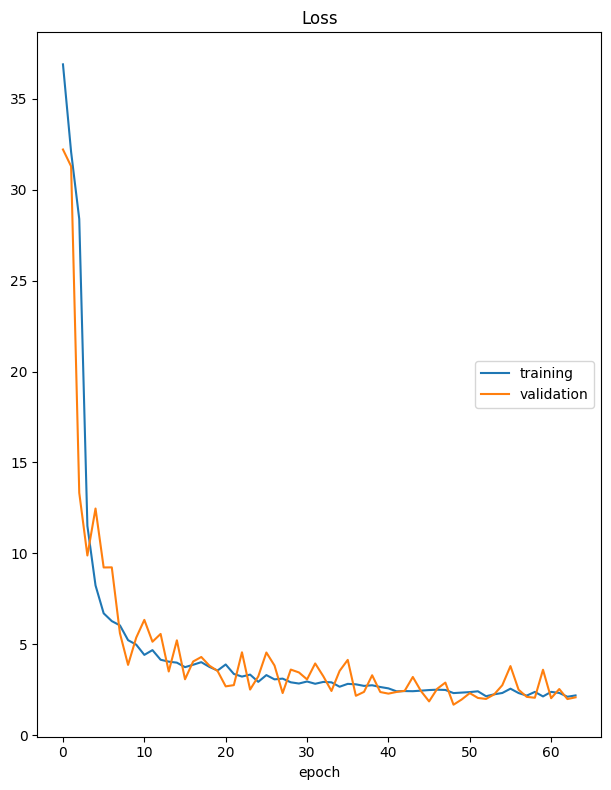

Loss
	training         	 (min:    2.117, max:   36.897, cur:    2.189)
	validation       	 (min:    1.679, max:   32.214, cur:    2.085)
213/213 [==============================] - 7s 32ms/step - loss: 2.1893 - val_loss: 2.0846


In [71]:
# Define the early stopping object
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=15, mode='min')

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, batch_size=128, validation_split=0.15, verbose=True, callbacks=[early_stopping, PlotLossesKeras()])

In [72]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

250/250 - 1s - loss: 2.0510 - 1s/epoch - 5ms/step


2.0509860515594482

In [73]:
print(model.predict([[0,2],[2,0],[1,1],[1.4,1.3],[-1,-1]]))

1/1 [==============================] - 0s 176ms/step
[[ 84.70625     7.825841 ]
 [  3.069973    6.2690573]
 [  1.226606   90.30976  ]
 [ 22.54473    36.488037 ]
 [176.79405    91.350105 ]]


In [74]:
model.save(f"invkine_model_{model_size}.h5")

/home/beedo/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


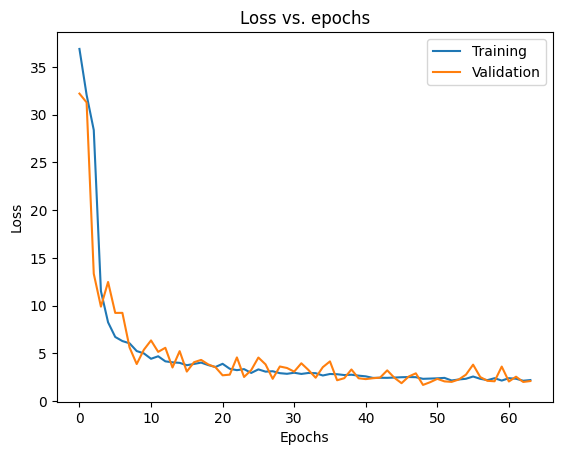

In [76]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Medium model------------------------------------------------------------

In [79]:
# loading csv dataset for manipulator
model_size = "medium"
df = pd.read_csv(f"manipulator_dataset_{model_size}.csv", index_col=False)
df

,x,y,q1,q2
0,2.000000,0.000000e+00,0.0,0.000000
1,1.999497,3.172793e-02,0.0,1.818182
2,1.997987,6.342392e-02,0.0,3.636364
3,1.995472,9.505604e-02,0.0,5.454545
4,1.991955,1.265925e-01,0.0,7.272727
...,...,...,...,...
9995,-0.008045,-1.265925e-01,180.0,172.727273
9996,-0.004528,-9.505604e-02,180.0,174.545455
9997,-0.002013,-6.342392e-02,180.0,176.363636
9998,-0.000503,-3.172793e-02,180.0,178.181818


In [80]:
# creating data and label dataframes and 

features = df.copy()
features.pop("q1")
features.pop("q2")
labels = df.copy()
labels.pop("x")
labels.pop("y")

features = np.array(features)
labels = np.array(labels)

In [81]:
# clean, normalize, and split data
feat_mean = np.mean(features, axis=0)
feat_std = np.std(features, axis=0)
lab_mean = np.mean(labels, axis=0)
lab_std = np.std(labels, axis=0)

train_data, test_data, train_targets, test_targets = train_test_split(features, labels, test_size=0.2)

In [82]:
# build the model
def get_model(wd, rate):
    model = Sequential([
        Dense(512, kernel_regularizer = regularizers.l1_l2(wd, wd), activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(train_targets.shape[1])
    ])
    return model

model = get_model(1e-3, 0.2)

# Print the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 512)               1536      
                                                                 
 dense_146 (Dense)           (None, 512)               262656    
                                                                 
 dense_147 (Dense)           (None, 512)               262656    
                                                                 
 dense_148 (Dense)           (None, 512)               262656    
                                                                 
 dense_149 (Dense)           (None, 512)               262656    
                                                                 
 dense_150 (Dense)           (None, 512)               262656    
                                                                 
 dense_151 (Dense)           (None, 512)             

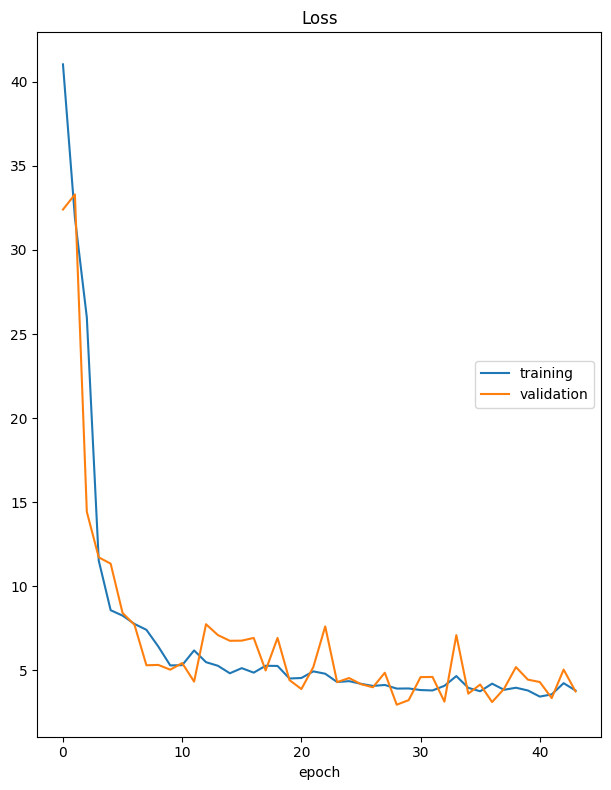

Loss
	training         	 (min:    3.445, max:   41.035, cur:    3.807)
	validation       	 (min:    2.962, max:   33.300, cur:    3.751)
107/107 [==============================] - 2s 21ms/step - loss: 3.8070 - val_loss: 3.7509


In [83]:
# Define the early stopping object
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=15, mode='min')

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, batch_size=64, validation_split=0.15, verbose=True, callbacks=[early_stopping, PlotLossesKeras()])

In [84]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

63/63 - 0s - loss: 3.5739 - 197ms/epoch - 3ms/step


3.573881149291992

In [85]:
print(model.predict([[0,2],[2,0],[1,1],[1.4,1.3],[-1,-1]]))

1/1 [==============================] - 0s 94ms/step
[[ 84.75802     7.5900164]
 [  0.9140512   7.822573 ]
 [  1.5991259  94.37252  ]
 [ 23.563688   38.245888 ]
 [186.80289    97.45472  ]]


In [86]:
model.save(f"invkine_model_{model_size}.h5")

/home/beedo/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


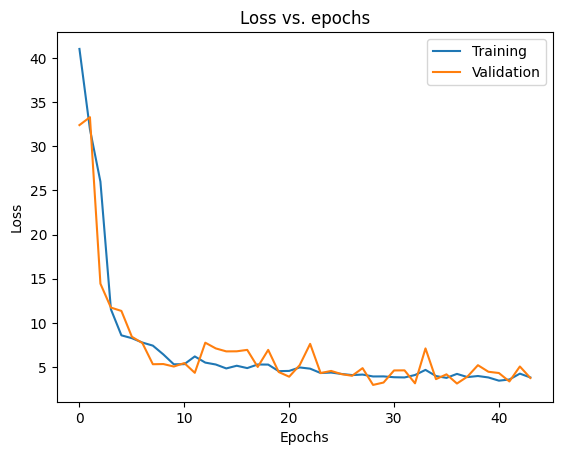

In [87]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Small model------------------------------------------------------------

In [88]:
# loading csv dataset for manipulator
model_size = "small"
df = pd.read_csv(f"manipulator_dataset_{model_size}.csv", index_col=False)
df

,x,y,q1,q2
0,2.000000,0.000000e+00,0.0,0.000000
1,1.997945,6.407022e-02,0.0,3.673469
2,1.991790,1.278772e-01,0.0,7.346939
3,1.981559,1.911586e-01,0.0,11.020408
4,1.967295,2.536546e-01,0.0,14.693878
...,...,...,...,...
2495,-0.032705,-2.536546e-01,180.0,165.306122
2496,-0.018441,-1.911586e-01,180.0,168.979592
2497,-0.008210,-1.278772e-01,180.0,172.653061
2498,-0.002055,-6.407022e-02,180.0,176.326531


In [89]:
# creating data and label dataframes and 

features = df.copy()
features.pop("q1")
features.pop("q2")
labels = df.copy()
labels.pop("x")
labels.pop("y")

features = np.array(features)
labels = np.array(labels)

In [90]:
# clean, normalize, and split data
feat_mean = np.mean(features, axis=0)
feat_std = np.std(features, axis=0)
lab_mean = np.mean(labels, axis=0)
lab_std = np.std(labels, axis=0)

train_data, test_data, train_targets, test_targets = train_test_split(features, labels, test_size=0.2)

In [91]:
# build the model
def get_model(wd, rate):
    model = Sequential([
        Dense(512, kernel_regularizer = regularizers.l1_l2(wd, wd), activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(train_targets.shape[1])
    ])
    return model

model = get_model(1e-3, 0.2)

# Print the model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 512)               1536      
                                                                 
 dense_156 (Dense)           (None, 512)               262656    
                                                                 
 dense_157 (Dense)           (None, 512)               262656    
                                                                 
 dense_158 (Dense)           (None, 512)               262656    
                                                                 
 dense_159 (Dense)           (None, 512)               262656    
                                                                 
 dense_160 (Dense)           (None, 512)               262656    
                                                                 
 dense_161 (Dense)           (None, 2)               

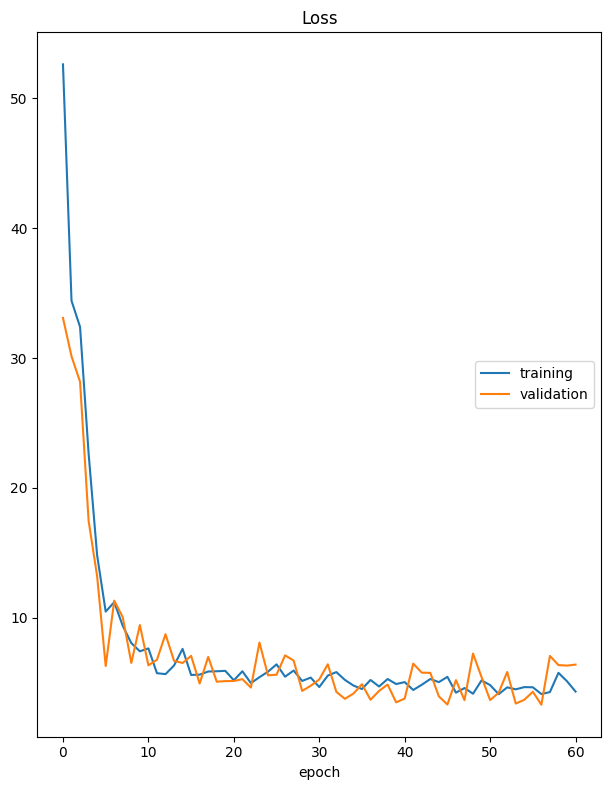

Loss
	training         	 (min:    4.122, max:   52.613, cur:    4.322)
	validation       	 (min:    3.309, max:   33.087, cur:    6.395)
54/54 [==============================] - 1s 14ms/step - loss: 4.3217 - val_loss: 6.3949


In [92]:
# Define the early stopping object
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=15, mode='min')

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, batch_size=32, validation_split=0.15, verbose=True, callbacks=[early_stopping, PlotLossesKeras()])

In [93]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

16/16 - 0s - loss: 6.6438 - 37ms/epoch - 2ms/step


6.643839359283447

In [94]:
print(model.predict([[0,2],[2,0],[1,1],[1.4,1.3],[-1,-1]]))

1/1 [==============================] - 0s 73ms/step
[[ 85.432686    8.785759 ]
 [  1.9995377   6.933318 ]
 [  3.2552783 100.215836 ]
 [ 25.417166   36.427963 ]
 [182.73102    95.10061  ]]


In [95]:
model.save(f"invkine_model_{model_size}.h5")

/home/beedo/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


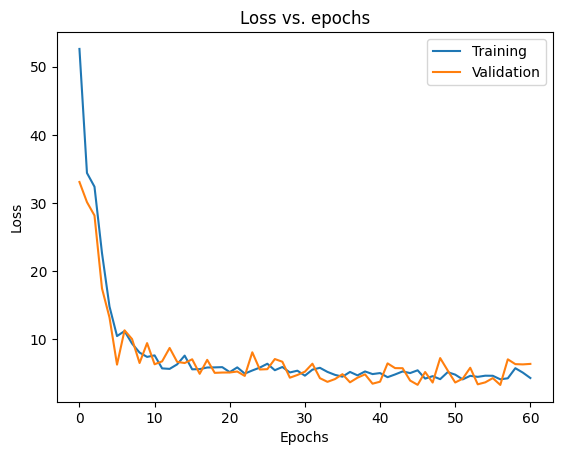

In [96]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()